<a href="https://colab.research.google.com/github/fkihu/Model-Quality-and-Improvement-Assignment/blob/main/Week_7D3_Assignment_Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

As a data scientist, you have been tasked to study some past telemarketing campaign
data to better identify various groups of customers. Using the given dataset, perform
customer segmentation and provide general insights about the different groups of
customers.

### b) Defining the Metric for Success

The project will be a success when we are able to create clusters with well-defined boundaries.

### c) Understanding the Context 

A telemarketing campaign was done by a certain bank to make customers familiar with
new products. The goal of this campaign was eventually to have those existing
customers purchase the new products.

### d) Recording the Experimental Design

- Load libraries and dataset
- Find and deal with duplicates and missing values
- Find and deal with outliers
- Find and deal with other data anomalies
- Perform univariate and bivariate analysis
- Carry out modeling
- Summarize findings and make recommendations
- Challenge the solution

### e) Data Relevance

The dataset is appropriate for answering the research question.

# <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [ ]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [ ]:
# loading and previewing dataset
df = pd.read_csv('https://bit.ly/BankTeleDs', sep = ";")
df.sample(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12637,39,blue-collar,married,professional.course,no,no,no,cellular,jul,mon,280,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1
116,52,admin.,divorced,university.degree,no,no,no,telephone,may,mon,247,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
10035,38,admin.,married,university.degree,no,no,no,telephone,jun,thu,781,2,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1


In [ ]:
# loading the dataset glossary
glossary = pd.read_csv('https://bit.ly/BankTeleDsGlossary', header = None)
glossary

,0
0,age - Age of the client- (numeric)
1,job - Client’s occupation - (categorical)
2,"(admin, bluecollar, entrepreneur, housemaid, management, retired, selfemployed, services, student, technician, unemployed, unknown)"
3,marital - Client’s marital status - (categorical)
4,"(divorced, married, single, unknown, note: divorced means divorced or widowed)"
5,education - Client’s education level - (categorical)
6,"(basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)"
7,default - Indicates if the client has credit in default - (categorical)
8,"(no, yes, unknown)"
9,housing - Does the client as a housing loan? - (categorical)


In [ ]:
# checking dataset shape
df.shape

(41188, 20)

Our dataset has 41,188 records and 20 variables.

In [ ]:
# checking data types
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [ ]:
# dropping duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(41176, 20)

A few duplicates were dropped.

In [ ]:
# checking for missing data
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

There are no missing values in this dataset. We will check the unique values of each individual variable just to be absolutely certain.

In [ ]:
# get the unique value of each variable to ensure there are no anomalies
cols = df.columns.to_list()

for col in cols:
    print("Variable:", col)
    print("Number of unique variables:", df[col].nunique())
    print(df[col].unique())
    print()

Variable: age
Number of unique variables: 78
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

Variable: job
Number of unique variables: 12
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Variable: marital
Number of unique variables: 4
['married' 'single' 'divorced' 'unknown']

Variable: education
Number of unique variables: 8
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Variable: default
Number of unique variables: 3
['no' 'unknown' 'yes']

Variable: housing
Number of unique variables: 3
['no' 'yes' 'unknown']

Variable: loan
Number of unique variables: 3
['no' 'yes' 'unknown']

Variable: contact
Number of unique variables: 2
[

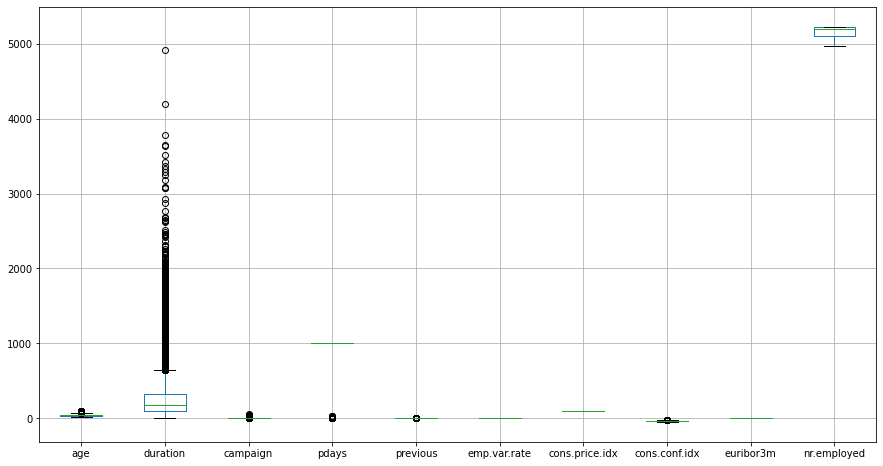

In [ ]:
# visualizing the distribution of outliers
plt.figure(figsize = (15, 8))
df.boxplot()
plt.show()

The 'duration' variable has the highest number of outliers.

In [ ]:
# getting the records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
print(outliers_df.shape)
outliers_df.sample(3)

(10827, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
16240,43,services,divorced,unknown,unknown,yes,yes,cellular,jul,tue,483,7,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1
28696,45,services,divorced,basic.4y,no,no,yes,cellular,apr,thu,1579,1,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1
8101,41,technician,married,professional.course,unknown,yes,no,telephone,jun,mon,442,11,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1


In [ ]:
# calculating percentage of outliers
round((outliers_df.shape[0] / df.shape[0]) * 100, 2)

26.29

# <font color='#2F4F4F'>3. Data Analysis</font>

### 3.1 Univariate Analysis

In [ ]:
# selecting the columns that are categorical variables
cat_var = df.select_dtypes(include = ['object']).columns.to_list()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

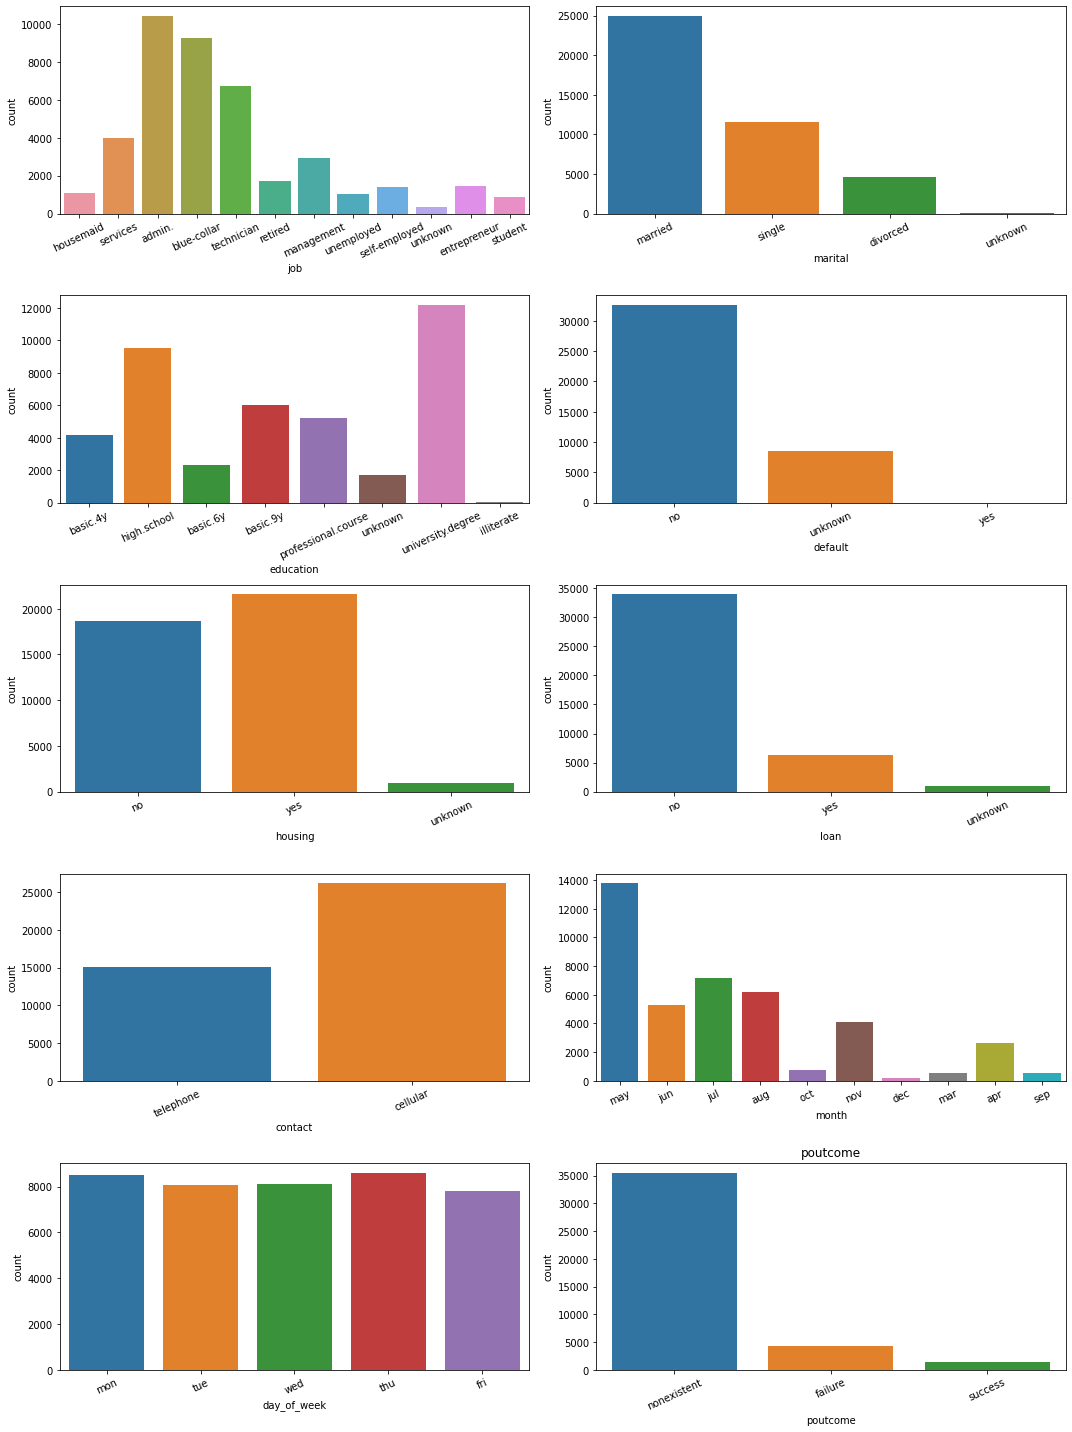

In [ ]:
# plotting the bar graph distributions of the categorical variables
number_rows = round(len(cat_var) / 2)
colors = sns.color_palette("rocket", len(cat_var))

fig, axes = plt.subplots(nrows = number_rows, ncols = 2, figsize = (15, 20))

for var, color, ax in zip(cat_var, colors, axes.flatten()):
    bar_plot = sns.countplot(df[var], ax = ax)
    bar_plot.set_xticklabels(labels = df[var].unique(), rotation = 25)
    plt.title(var)
    
plt.tight_layout()

Majority of the clients displayed the following:
- work as admins followed by those in blue-collar jobs
- are married
- have a university degree
- do not have credit in default
- have a housing loan
- do not have a personal loan
- contact via cellular
- were last contacted in the month of May
- were last contacted on Thursdays and Mondays
- have nonexistent previous marketing outcomes.

In [ ]:
# selecting the columns that are numerical variables
num_var = df.select_dtypes(include = ['int64', 'float64']).columns.to_list()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


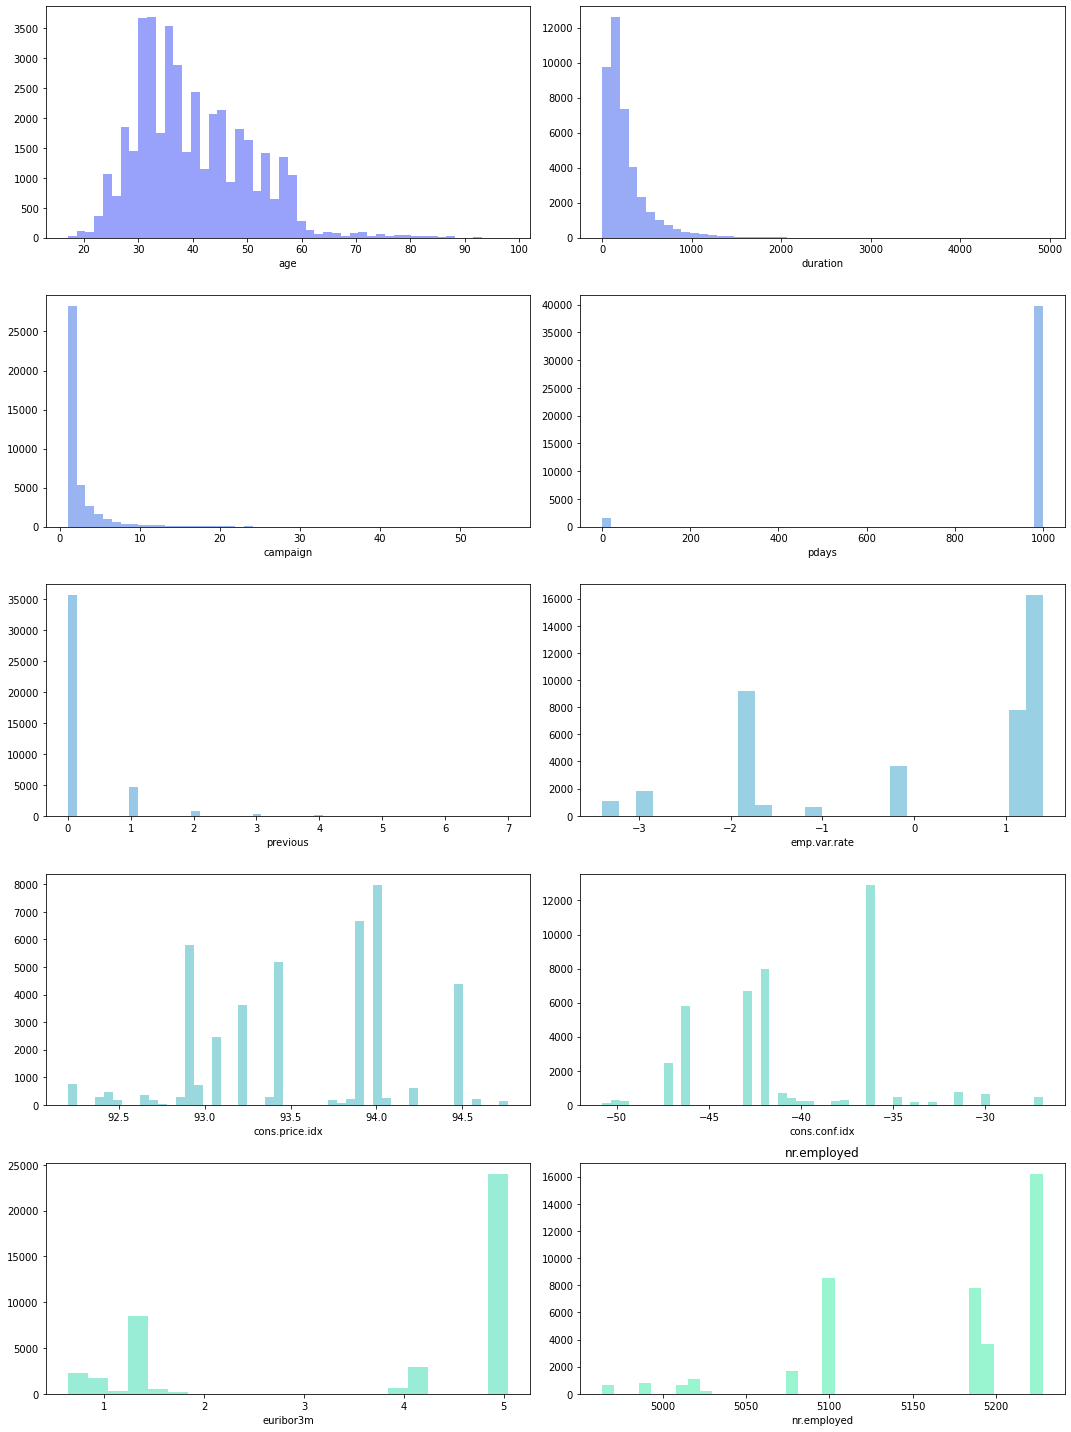

In [ ]:
# plotting the bar graph distributions of the categorical variables
number_rows = round(len(num_var) / 2)
colors = sns.color_palette("winter", len(num_var))

fig, axes = plt.subplots(nrows = number_rows, ncols = 2, figsize = (15, 20))

for var, color, ax in zip(num_var, colors, axes.flatten()):
    sns.distplot(df[var], ax = ax, color = color, kde = False)
    plt.title(var)
    
plt.tight_layout()

Our numerical variables do not have normal distributions.

### 3.2 Bivariate Analysis

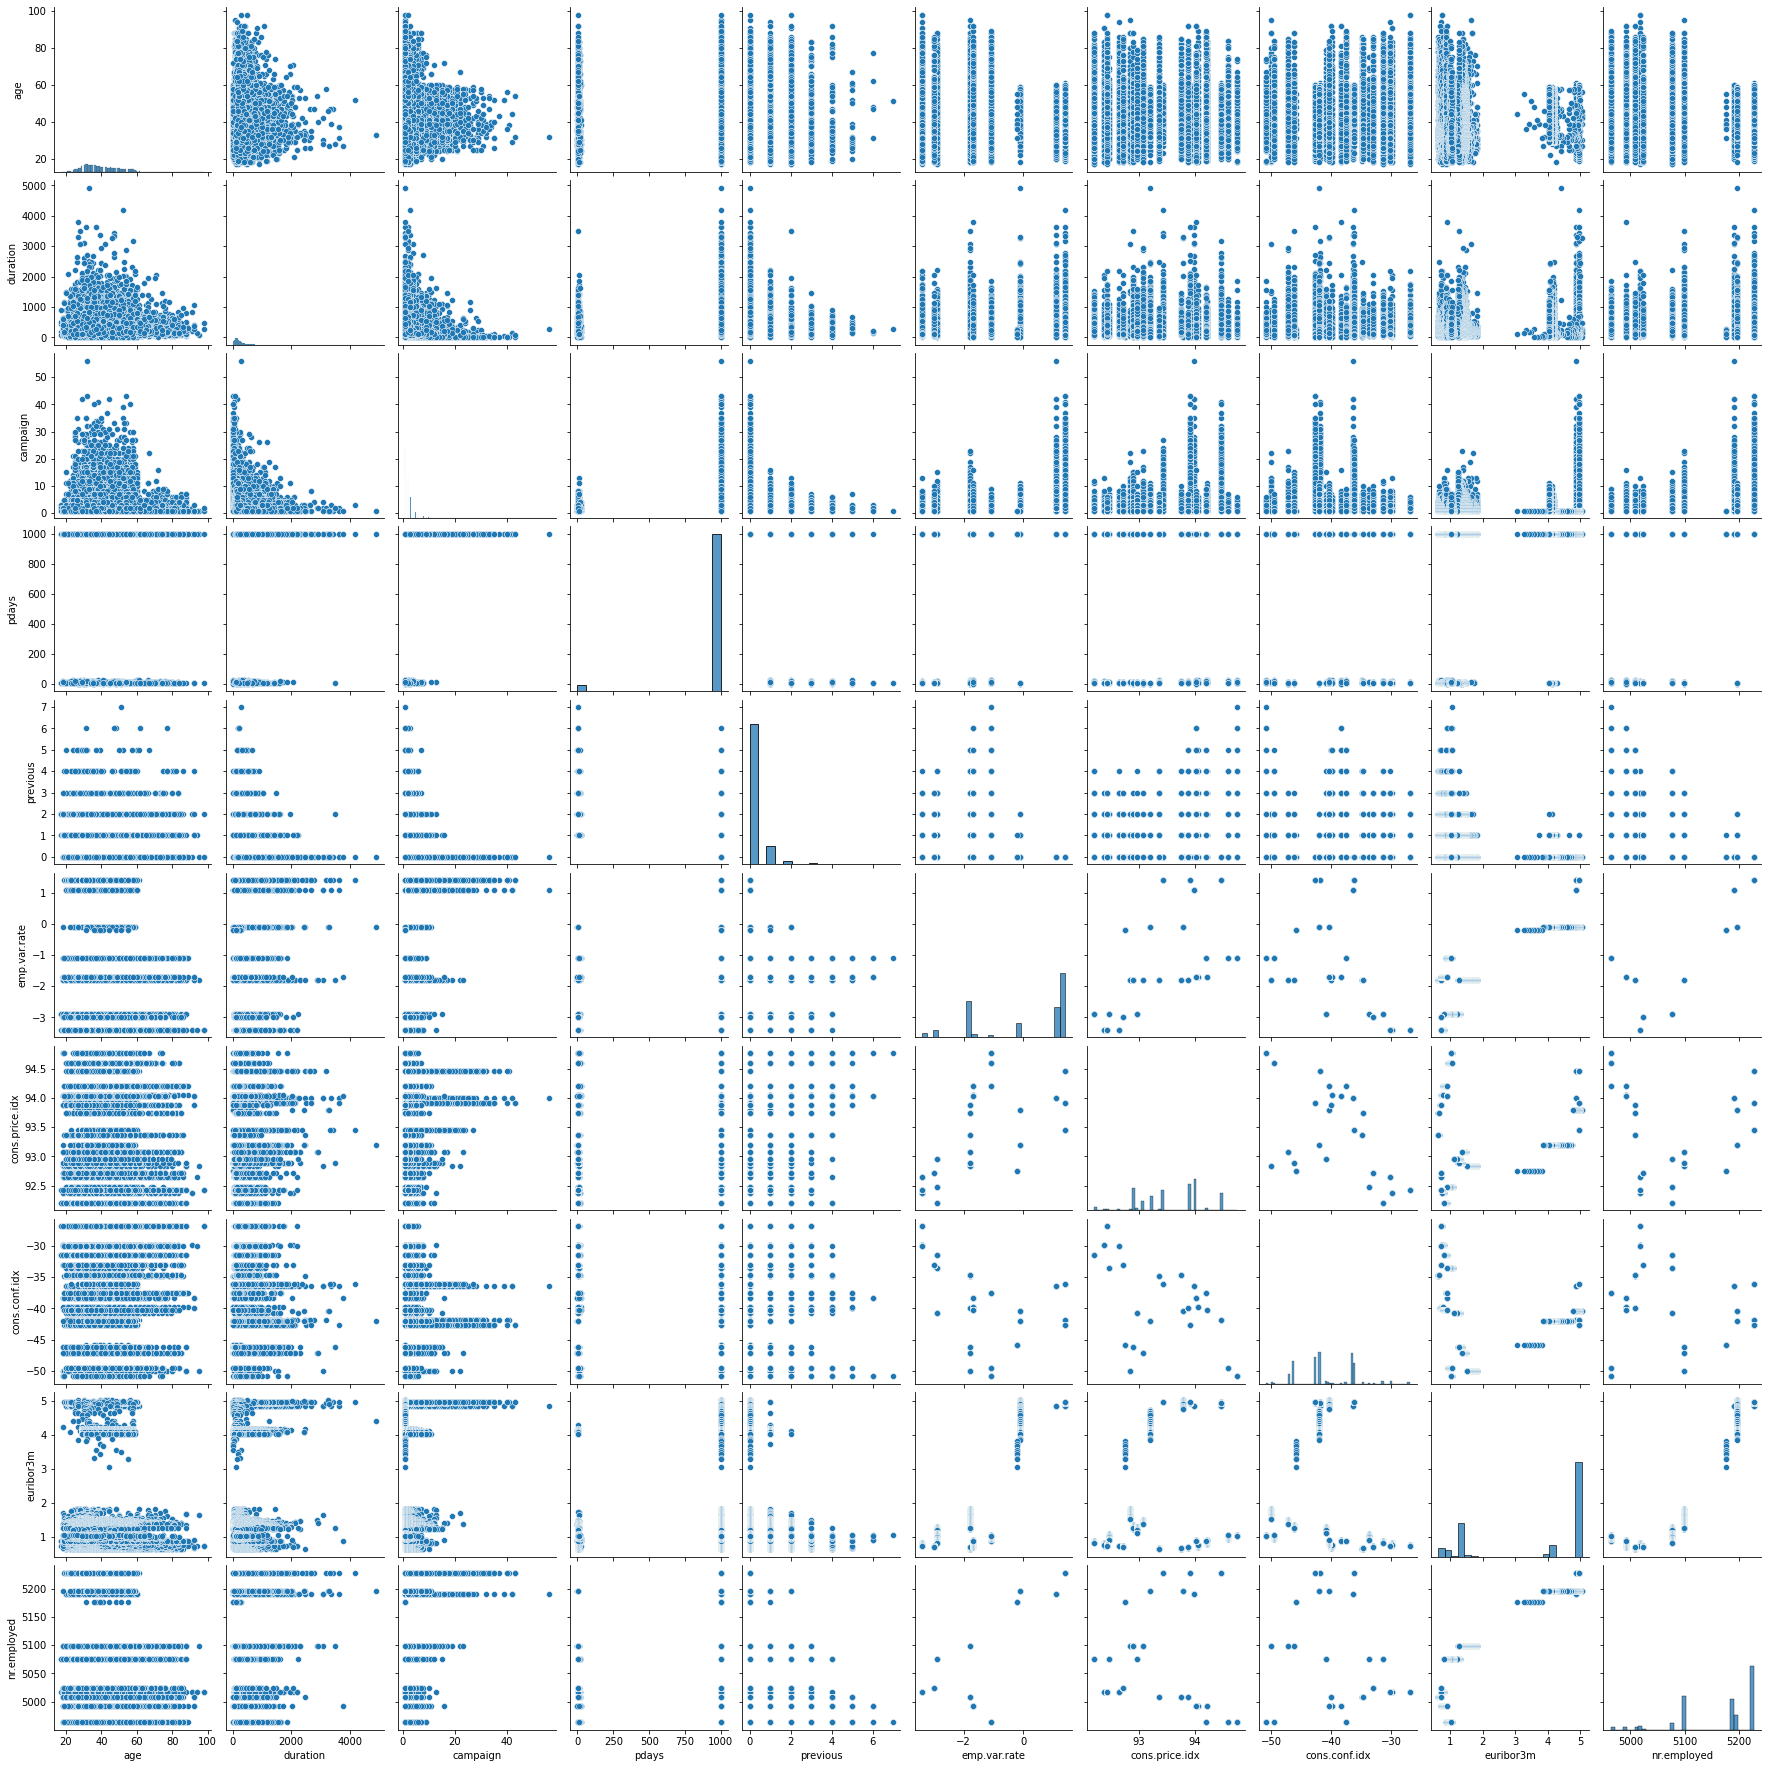

In [ ]:
# generate a pairplot so we can see how the numerical variables relate to one another
sns.pairplot(df)

There does not seem to be any pattern or linearity in the relationships between our variables. We will now encode our categorical variables in preparation of modeling.

In [ ]:
# looping through our categorical variables to encode them
from sklearn.preprocessing import LabelEncoder

# dictionary to store each unique variable class
label_classes = {}

for var in cat_var:
    le = LabelEncoder().fit(df[var].unique())
    classed = le.classes_
    label_classes[var] = classed
    df[var] = le.transform(df[var].values)

# previewing our label classes
label_classes

{'contact': array(['cellular', 'telephone'], dtype=object),
 'day_of_week': array(['fri', 'mon', 'thu', 'tue', 'wed'], dtype=object),
 'default': array(['no', 'unknown', 'yes'], dtype=object),
 'education': array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree', 'unknown'],
       dtype=object),
 'housing': array(['no', 'unknown', 'yes'], dtype=object),
 'job': array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 'loan': array(['no', 'unknown', 'yes'], dtype=object),
 'marital': array(['divorced', 'married', 'single', 'unknown'], dtype=object),
 'month': array(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
        'sep'], dtype=object),
 'poutcome': array(['failure', 'nonexistent', 'success'], dtype=object)}

In [ ]:
# if we want to get job value 6, we do it like this
label_classes['job'][6]

'self-employed'

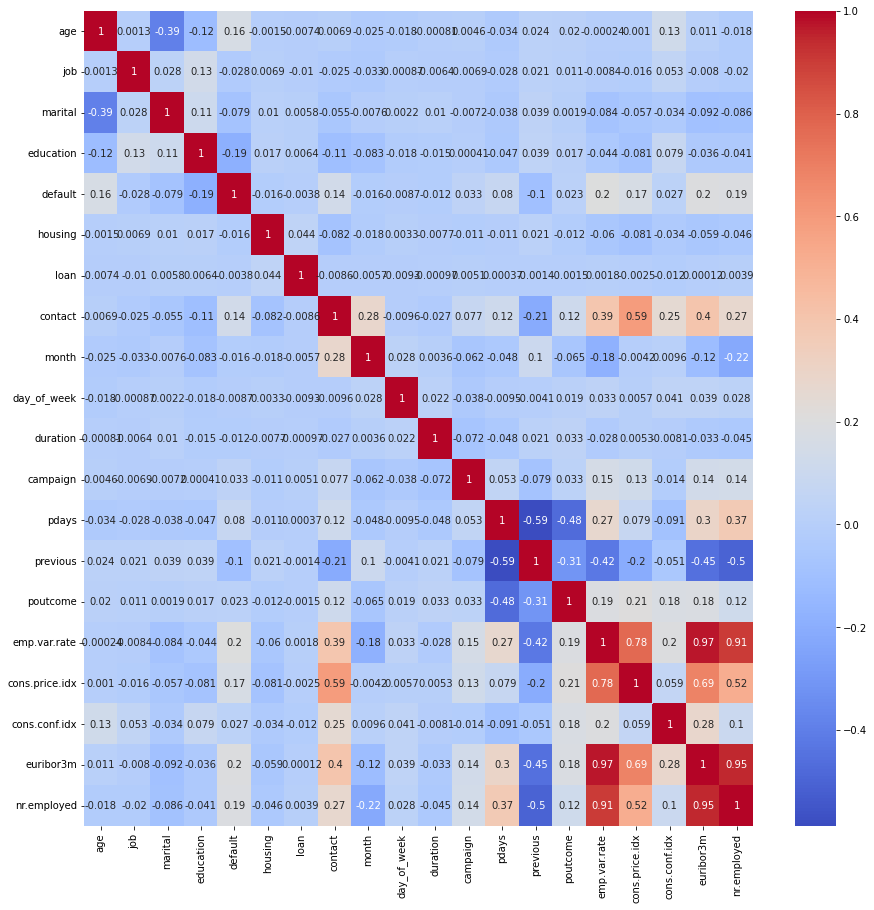

In [ ]:
# visualizing the correlations between the variables
corr = df.corr()

plt.figure(figsize = (15, 15))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

We see some high correlations, especially with variables like 'emp.var.rate' and 'euribor3m' (0.97), 'euribor3m' and 'nr.employed' (0.95), and 'nr.employed' and 'emp.var.rate' (0.91)

# <font color='#2F4F4F'>4. Data Modeling</font>

### 4.1 Data preparation

In [ ]:
# set all the features into X
# YOUR CODE HERE

X = df.iloc[:,].values
X[:5]

array([[ 5.6000e+01,  3.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  1.0000e+00,  6.0000e+00,  1.0000e+00,
         2.6100e+02,  1.0000e+00,  9.9900e+02,  0.0000e+00,  1.0000e+00,
         1.1000e+00,  9.3994e+01, -3.6400e+01,  4.8570e+00,  5.1910e+03],
       [ 5.7000e+01,  7.0000e+00,  1.0000e+00,  3.0000e+00,  1.0000e+00,
         0.0000e+00,  0.0000e+00,  1.0000e+00,  6.0000e+00,  1.0000e+00,
         1.4900e+02,  1.0000e+00,  9.9900e+02,  0.0000e+00,  1.0000e+00,
         1.1000e+00,  9.3994e+01, -3.6400e+01,  4.8570e+00,  5.1910e+03],
       [ 3.7000e+01,  7.0000e+00,  1.0000e+00,  3.0000e+00,  0.0000e+00,
         2.0000e+00,  0.0000e+00,  1.0000e+00,  6.0000e+00,  1.0000e+00,
         2.2600e+02,  1.0000e+00,  9.9900e+02,  0.0000e+00,  1.0000e+00,
         1.1000e+00,  9.3994e+01, -3.6400e+01,  4.8570e+00,  5.1910e+03],
       [ 4.0000e+01,  0.0000e+00,  1.0000e+00,  1.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  1.0000e+00,  

In [ ]:
# scaling our features
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# YOUR CODE HERE

norm = MinMaxScaler().fit(X) 
X = norm.transform(X) 

X[:5]


array([[0.48148148, 0.27272727, 0.33333333, 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.66666667, 0.25      ,
        0.05307035, 0.        , 1.        , 0.        , 0.5       ,
        0.9375    , 0.69875292, 0.60251046, 0.95737928, 0.85973535],
       [0.49382716, 0.63636364, 0.33333333, 0.42857143, 0.5       ,
        0.        , 0.        , 1.        , 0.66666667, 0.25      ,
        0.03029687, 0.        , 1.        , 0.        , 0.5       ,
        0.9375    , 0.69875292, 0.60251046, 0.95737928, 0.85973535],
       [0.24691358, 0.63636364, 0.33333333, 0.42857143, 0.        ,
        1.        , 0.        , 1.        , 0.66666667, 0.25      ,
        0.04595364, 0.        , 1.        , 0.        , 0.5       ,
        0.9375    , 0.69875292, 0.60251046, 0.95737928, 0.85973535],
       [0.28395062, 0.        , 0.33333333, 0.14285714, 0.        ,
        0.        , 0.        , 1.        , 0.66666667, 0.25      ,
        0.03070354, 0.        , 1.        , 0

### 4.2 K-Means Clustering

In [ ]:
# Passing our data to our clusterer 
#
from sklearn.cluster import KMeans

# YOUR CODE HERE

clusterer = KMeans(3, random_state=0)

clusterer.fit(X)

KMeans(n_clusters=3, random_state=0)

In [ ]:
# Predicting our labels
#
# YOUR CODE HERE

df['kmeans_cluster_group'] = clusterer.predict(X)
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,kmeans_cluster_group
29289,39,7,1,3,0,0,0,0,0,0,185,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,1
33614,31,9,1,3,1,2,2,1,6,3,234,5,999,0,1,-1.8,92.893,-46.2,1.291,5099.1,1
24030,36,7,1,3,0,2,0,1,8,2,41,1,999,0,1,-0.1,93.798,-40.4,4.921,5195.8,0
3615,50,1,2,2,1,0,0,1,6,0,165,1,999,0,1,1.1,93.994,-36.4,4.859,5191.0,0
17902,50,7,2,3,0,2,0,0,3,3,110,2,999,0,1,1.4,93.918,-42.7,4.961,5228.1,2


In [ ]:
# Determining cluster records i.e. cluster 1, 2 and 3
# 
# YOUR CODE HERE

df['kmeans_cluster_group'].value_counts()

2    13970
0    13712
1    13494
Name: kmeans_cluster_group, dtype: int64

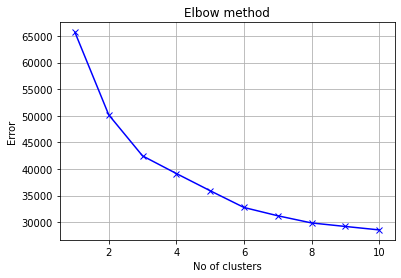

In [ ]:
# Performing Elbow method
#
# YOUR CODE HERE
Error = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

# We plot our elbow method visualisation: No. of clusters vs Error
# ---
# 
plt.plot(range(1, 11), Error, 'bx-')
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.grid(True);

What is the ideal value of k? 2

In [ ]:
# Perfoming Silhouette Analysis
#
from sklearn.metrics import silhouette_score
# YOUR CODE HERE

silhouette = [] # list of separation distance between the resulting clusters for each value of k 

K = range(2, 12)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X) 
    silhouette.append(silhouette_score(X, kmeans.labels_))

silhouette

[0.24777915305134898,
 0.21057104144504057,
 0.18145311214734428,
 0.20737471422650558,
 0.22939253662969467,
 0.2343678626729198,
 0.2329552181694149,
 0.2407014548956487,
 0.1893329135641312,
 0.19727265598627386]

What does the Silhouette Analysis tell you?

The silhouette coefficient was highest when k = 2, suggesting that's the optimal number of clusters. Two clusters best captures the segmentation of this data set.

### 4.3 Hierarchical Agglomerative Clustering

You can also attempt clustering using hierarchical agglomerative clustering. However because of resource constraints we won't implement if for now.

# <font color='#2F4F4F'> 5. Modeling Data Analysis</font>

### 5.1 Data Analysis on Clusters

We can perform data analysis on different customer segments and then highlight insights from our analysis.

In [ ]:
# selecting records where the cluster is 0
# YOUR CODE HERE
cluster_0 = df[df.kmeans_cluster_group.isin([0])]

# selecting records where the cluster is 1
# YOUR CODE HERE
cluster_1 = df[df.kmeans_cluster_group.isin([1])]

# selecting records where the cluster is 2
# YOUR CODE HERE
cluster_2 = df[df.kmeans_cluster_group.isin([2])]


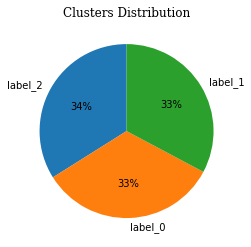

In [ ]:
# plotting the pie chart of the distribution of the clusters
# YOUR CODE HERE
clusters = df['kmeans_cluster_group'].value_counts()
labels = ['label_2', 'label_0', 'label_1']
plt.pie(clusters, startangle = 90, labels = labels, autopct = '%.0f%%')

# Tweak & Label
plt.title('Clusters Distribution', fontdict= {'fontname': 'Serif', 'fontsize': 12})  

# Display
plt.show()

Observations: The labels are generally evenly distributed, with the label_2 having a slightly higher portion.

In [ ]:
# Data analysis technique 1
# ---
# get distribution of age for each cluster
# YOUR CODE HERE

df['age'].groupby([df['kmeans_cluster_group']]).mean()


kmeans_cluster_group
0    40.188448
1    39.672076
2    40.201933
Name: age, dtype: float64

Note your observations. The average age for the three clusters is almost the same, with the average in the 1st cluster being the lowest.

In [ ]:
# Data analysis technique 2
# ---
# get distribution of job for each cluster
# YOUR CODE HERE
print(cluster_1['job'].value_counts())
print(cluster_0['job'].value_counts())
print(cluster_2['job'].value_counts())


0     3592
1     2782
9     1869
7     1248
5      923
4      909
8      682
6      429
2      390
10     352
3      236
11      82
Name: job, dtype: int64
1     3953
0     2919
9     1934
7     1546
4      935
2      561
6      488
3      389
5      383
10     337
11     154
8      113
Name: job, dtype: int64
0     3908
9     2936
1     2518
7     1173
4     1080
2      505
6      504
3      435
5      412
10     325
11      94
8       80
Name: job, dtype: int64


In [ ]:
# decoding the values
for i in range(0, 12):
    print("Value {}: {}".format(i, label_classes['job'][i]))

Value 0: admin.
Value 1: blue-collar
Value 2: entrepreneur
Value 3: housemaid
Value 4: management
Value 5: retired
Value 6: self-employed
Value 7: services
Value 8: student
Value 9: technician
Value 10: unemployed
Value 11: unknown


Note your observations.

For all the three clusters, the jobs with the highest frequencies are: admin, blue-collar, technician and services.

In [ ]:
# Data analysis technique 3
# ---
# get distribution of marital for each cluster
# YOUR CODE HERE
print(cluster_0['marital'].value_counts())
print(cluster_1['marital'].value_counts())
print(cluster_2['marital'].value_counts())

1    9042
2    3085
0    1560
3      25
Name: marital, dtype: int64
1    7332
2    4751
0    1378
3      33
Name: marital, dtype: int64
1    8547
2    3728
0    1673
3      22
Name: marital, dtype: int64


In [ ]:
# decoding the values
for i in range(0, 4):
    print("Value {}: {}".format(i, label_classes['marital'][i]))

Value 0: divorced
Value 1: married
Value 2: single
Value 3: unknown


Note your observations.

In all the three clusters, the highest frequency is the married, followed by the single, then the divorced.
The majority of the married fall in the cluster_0. The majority of the single fall in the cluster_1 while the majority of the divorced fall in cluster_2.
 

In [ ]:
# Data analysis technique 4
# ---
# get distribution of education for each cluster
# YOUR CODE HERE
print(cluster_0['education'].value_counts())
print(cluster_1['education'].value_counts())
print(cluster_2['education'].value_counts())

3    3270
6    3064
2    2421
0    1715
5    1591
1     997
7     652
4       2
Name: education, dtype: int64
6    4182
3    3301
2    1903
5    1593
0    1241
1     682
7     586
4       6
Name: education, dtype: int64
6    4918
3    2941
5    2056
2    1721
0    1220
1     612
7     492
4      10
Name: education, dtype: int64


In [ ]:
# decoding the values
for i in range(0, 8):
    print("Value {}: {}".format(i, label_classes['education'][i]))

Value 0: basic.4y
Value 1: basic.6y
Value 2: basic.9y
Value 3: high.school
Value 4: illiterate
Value 5: professional.course
Value 6: university.degree
Value 7: unknown


Note your observations.

In all the three clusters, the highest frequencies are those with an education that is above basic. Cluster_2 and cluster_1 have the highest number of university degrees while cluster_0 has the highest number of high school level education.

In [ ]:
# Data analysis technique 5
# ---
# get distribution of default for each cluster
# YOUR CODE HERE
print(cluster_0['default'].value_counts())
print(cluster_1['default'].value_counts())
print(cluster_2['default'].value_counts())

0    9578
1    4134
Name: default, dtype: int64
0    12076
1     1418
Name: default, dtype: int64
0    10923
1     3044
2        3
Name: default, dtype: int64


In [ ]:
# decoding the values
for i in range(0, 3):
    print("Value {}: {}".format(i, label_classes['default'][i]))

Value 0: no
Value 1: unknown
Value 2: yes


Note your observations.

The majority of customers have credit in default. Cluster_1 has the highest number of customers with credit by default.

In [ ]:
# Data analysis technique 6
# ---
# get distribution of housing for each cluster
# YOUR CODE HERE
print(cluster_0['housing'].value_counts())
print(cluster_1['housing'].value_counts())
print(cluster_2['housing'].value_counts())

0    7027
2    6286
1     399
Name: housing, dtype: int64
2    7608
0    5567
1     319
Name: housing, dtype: int64
2    7677
0    6021
1     272
Name: housing, dtype: int64


In [ ]:
# decoding the values
for i in range(0, 3):
    print("Value {}: {}".format(i, label_classes['housing'][i]))

Value 0: no
Value 1: unknown
Value 2: yes


Note your observations.

Across all the three clusters, the majority of the customers have a housing loan. However, the number of those without a housing loan is relatively high.

In [ ]:
# Data analysis technique 7
# ---
# get distribution of loan for each cluster
# YOUR CODE HERE

print(cluster_0['loan'].value_counts())
print(cluster_1['loan'].value_counts())
print(cluster_2['loan'].value_counts())

0    11324
2     1989
1      399
Name: loan, dtype: int64
0    11116
2     2059
1      319
Name: loan, dtype: int64
0    11498
2     2200
1      272
Name: loan, dtype: int64


In [ ]:
# decoding the values
for i in range(0, 3):
    print("Value {}: {}".format(i, label_classes['loan'][i]))

Value 0: no
Value 1: unknown
Value 2: yes


Note your observations.

Across all the three clusters, the majority of the customers do not have personal loans. Those with personal loans are relatively few.

In [ ]:
# Data analysis technique 8
# ---
# get distribution of contact for each cluster
# YOUR CODE HERE

print(cluster_0['contact'].value_counts())
print(cluster_1['contact'].value_counts())
print(cluster_2['contact'].value_counts())

1    13712
Name: contact, dtype: int64
0    12165
1     1329
Name: contact, dtype: int64
0    13970
Name: contact, dtype: int64


In [ ]:
# decoding the values
for i in range(0, 2):
    print("Value {}: {}".format(i, label_classes['contact'][i]))

Value 0: cellular
Value 1: telephone


Note your observations.

All the customers in cluster_0 have telephone contacts. 

All the customers in cluster_2 have cellular contacts. 

The majority of the customers in cluster_1 have telephone contacts with a few of them having cellular contacts.

Once we perform data analyis on our clusters we can also perform data analysis with PCA (Principal Component Analysis) as shown in the next section. We will learn more about PCA in a later workshop.

### 4.2 Principal Component Analysis

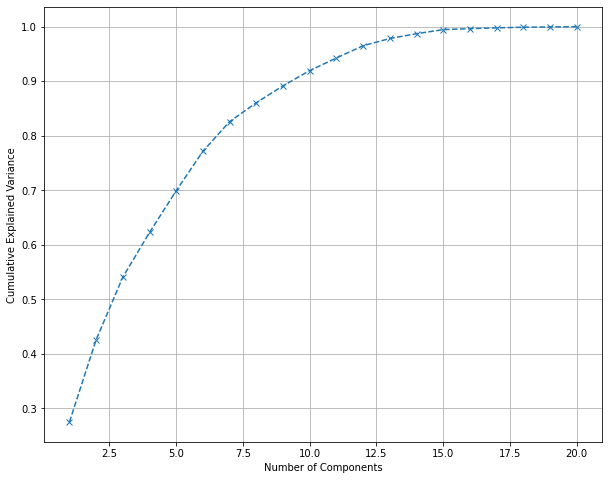

In [ ]:
from sklearn.decomposition import PCA

# fitting PCA to our data 
pca = PCA(random_state = 0)
pca.fit(X)

# getting the explained variance ratio
evr = pca.explained_variance_ratio_
range_length = len(evr) + 1

# plotting the explained variance ratio so we can determine how many principal components to keep
plt.figure(figsize = (10, 8))
plt.plot(range(1, range_length), evr.cumsum(), marker = 'x', linestyle = '--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

We should select the number of components that explain at least 80% of the variance, hence we'll pick 11 components. We will now do PCA with 11 components.

In [ ]:
# set the number of PCA components to 11 and fit and transform your data
pca = PCA(n_components = 11, random_state = 0)
# pca.fit(X_scaled)
pca.fit(X)

pca_X = pca.transform(X)

### 4.3 K-Means Clustering with PCA

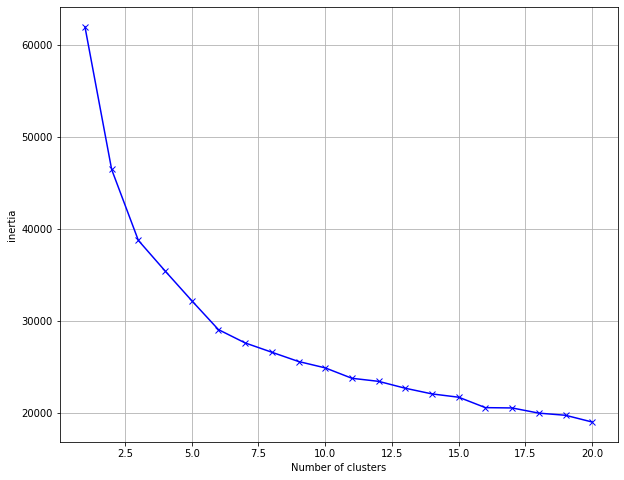

In [ ]:
# using the Elbow Method to determine the ideal number of clusters for K-Means

wcss = [] # stands for "Within Cluster Sum of Squares"
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(pca_X)
    wcss.append(kmeans.inertia_)
    
# visualizing the inertia (WCSS)
plt.figure(figsize = (10, 8))
plt.plot(range(1, 21), wcss, 'bx-')
plt.xlabel("Number of clusters")
plt.ylabel("inertia")
plt.grid(True)
plt.show()

From the graph, we see that the ideal number of clusters to use would be 5.

In [ ]:
# fitting to our PCA-transformed values
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
kmeans.fit(pca_X)

KMeans(n_clusters=5, random_state=0)

In [ ]:
# adding our results to a dataframe
pca_columns = []
for i in range(1, 12):
    pca_columns.append("pca_" + str(i))
    
kmeans_pca_df = pd.DataFrame(pca_X, columns = pca_columns)

# now adding the cluster labels
kmeans_pca_df['cluster'] = kmeans.labels_

# previewing our dataset
kmeans_pca_df.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,cluster
0,-0.759492,0.514259,0.397826,-0.084745,-0.179410,-0.294546,0.331636,0.037235,0.111382,-0.002458,-0.254782,3
1,-0.769731,0.500366,0.326918,-0.104537,-0.280480,0.171346,0.283408,-0.001234,0.087686,0.201043,0.277713,3
2,-0.600617,-0.472311,0.470457,-0.171826,-0.295245,0.219844,0.177986,-0.035881,0.101276,-0.010991,-0.182347,4
3,-0.755988,0.514306,0.394523,-0.069402,-0.161285,-0.437197,0.051823,0.016990,0.104434,-0.037490,-0.227821,3
4,-0.728039,0.434769,0.320857,0.879927,-0.139787,0.290283,0.222395,-0.018752,0.110207,0.074388,-0.180941,3


In [ ]:
# renaming the clusters and storing them in a new column
kmeans_pca_df['Group'] = kmeans_pca_df['cluster'].map({0: 'A', 1: 'B', 2: 'C',
                                                       3: 'D', 4: 'E'})
kmeans_pca_df.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,cluster,Group
0,-0.759492,0.514259,0.397826,-0.084745,-0.179410,-0.294546,0.331636,0.037235,0.111382,-0.002458,-0.254782,3,D
1,-0.769731,0.500366,0.326918,-0.104537,-0.280480,0.171346,0.283408,-0.001234,0.087686,0.201043,0.277713,3,D
2,-0.600617,-0.472311,0.470457,-0.171826,-0.295245,0.219844,0.177986,-0.035881,0.101276,-0.010991,-0.182347,4,E
3,-0.755988,0.514306,0.394523,-0.069402,-0.161285,-0.437197,0.051823,0.016990,0.104434,-0.037490,-0.227821,3,D
4,-0.728039,0.434769,0.320857,0.879927,-0.139787,0.290283,0.222395,-0.018752,0.110207,0.074388,-0.180941,3,D


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


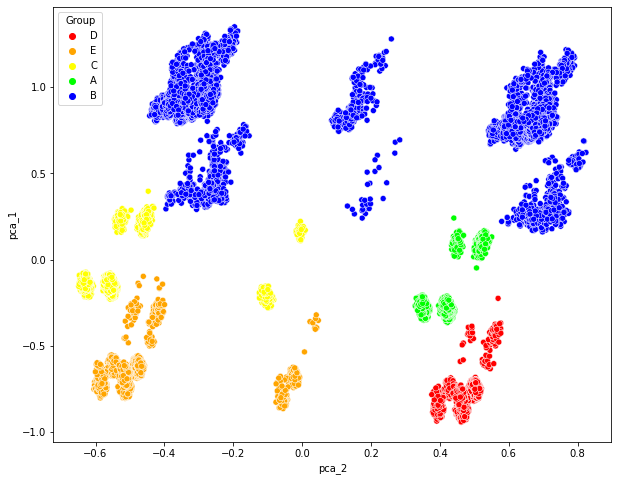

In [ ]:
x_axis = kmeans_pca_df['pca_2']
y_axis = kmeans_pca_df['pca_1']
colors = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#0000FF']

plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = kmeans_pca_df['Group'], palette = colors)
plt.show()

# <font color='#2F4F4F'>5. Summary of Findings</font>

Summarize your findings. (This summary doesn't include the findings from the PCA analysis).


1. The average age for the customers in all the three clusters is almost the same.
2. For all the three clusters, the jobs with the highest frequencies are: admin, blue-collar, technician and services.
3. In all the three clusters, the highest frequency is the married, followed by the single, then the divorced.
4. In all the three clusters, the highest frequencies are those with an education that is above basic. Cluster_2 and cluster_1 have the highest number of university degrees while cluster_0 has the highest number of high school level education.
5. The majority of customers have credit in default. Cluster_1 has the highest number of customers with credit by default.
6. Across all the three clusters, the majority of the customers have a housing loan. However, the number of those without a housing loan is relatively high.
7. Across all the three clusters, the majority of the customers have a housing loan. However, the number of those without a housing loan is relatively high.
8. Across all the three clusters, the majority of the customers do not have personal loans.
9. All the customers in cluster_0 have telephone contacts while all the customers in cluster_2 have cellular contacts. The majority of the customers in cluster_1 have telephone contacts.


# <font color='#2F4F4F'>6. Recommendations</font>

Provide your recommendations.

# <font color='#2F4F4F'>7. Challenging your Solution</font>

### a) Did we have the right question?


### b) Did we have the right data?


### c) What can be done to improve the solution?
